In [115]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

print("Imported modules.")

Imported modules.


In [116]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

#add bmi feature cross
dataFrame['BMI'] = dataFrame['Height'] / dataFrame['Weight']
dataFrame['SumStatic'] = dataFrame['Ankle'] + dataFrame['Knee'] + dataFrame['Wrist']

dataFrame = dataFrame.drop(columns=['Density', 'Height', 'Weight', 'Ankle', 'Knee', 'Wrist'])

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame

Data set loaded. Num examples:  252
Made training and test sets


,BodyFat,Age,Neck,Chest,Abdomen,Hip,Thigh,Biceps,Forearm,BMI,SumStatic
107,18.30,52,42.00,110.00,101.60,100.70,55.80,35.10,29.60,0.37,81.20
195,25.50,42,38.50,101.60,96.60,100.60,61.10,32.90,29.80,0.38,81.30
246,30.20,69,40.80,113.70,107.60,110.00,63.30,37.50,32.60,0.33,85.40
29,8.80,29,36.70,97.40,83.50,98.70,58.90,30.10,26.70,0.43,75.50
222,11.50,54,37.40,94.20,87.60,95.60,59.70,27.90,27.00,0.42,81.40
...,...,...,...,...,...,...,...,...,...,...,...
105,18.00,43,31.10,93.10,87.30,96.60,54.70,31.00,29.40,0.41,82.60
92,8.50,47,37.50,97.20,83.10,95.40,56.90,30.10,28.20,0.43,78.80
128,20.80,40,39.80,103.90,93.50,99.50,61.70,33.30,29.60,0.38,78.90
31,5.70,29,37.30,93.50,84.50,100.60,58.50,30.10,26.40,0.44,78.20


In [117]:
# Keras Input tensors of float values.
inputs = {
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'BMI':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='BMI'),
    'SumStatic':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='SumStatic'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'Chest':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Chest'),
    'Abdomen':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Abdomen'),
    'Hip':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Hip'),
    'Thigh':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Thigh'),
    'Biceps':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Biceps'),
    'Forearm':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Forearm'),
}

#Normalise
age_boundaries = [0, 30, 40, 50, 60, 70, float('inf')]

age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))

age = tf.keras.layers.Discretization(
    bin_boundaries=age_boundaries,
    name='discretization_age')(age)


bmi_boundaries = np.linspace(1.84,12.4, 6+1)

bmi = tf.keras.layers.Normalization(
    name = 'normalization_BMI',
    axis=None)
bmi.adapt(trainDF['BMI'])
bmi = bmi(inputs.get('BMI'))

bmi = tf.keras.layers.Discretization(
    bin_boundaries=bmi_boundaries,
    name='discretization_bmi')(bmi)

neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

chest = tf.keras.layers.Normalization(
    name = 'normalization_chest',
    axis=None)
chest.adapt(trainDF['Chest'])
chest = chest(inputs.get('Chest'))

abdomen = tf.keras.layers.Normalization(
    name = 'normalization_abdomen',
    axis=None)
abdomen.adapt(trainDF['Abdomen'])
abdomen = abdomen(inputs.get('Abdomen'))

hip = tf.keras.layers.Normalization(
    name = 'normalization_hip',
    axis=None)
hip.adapt(trainDF['Hip'])
hip = hip(inputs.get('Hip'))

thigh = tf.keras.layers.Normalization(
    name = 'normalization_thigh',
    axis=None)
thigh.adapt(trainDF['Thigh'])
thigh = thigh(inputs.get('Thigh'))

biceps = tf.keras.layers.Normalization(
    name = 'normalization_biceps',
    axis=None)
biceps.adapt(trainDF['Biceps'])
biceps = biceps(inputs.get('Biceps'))

forearm = tf.keras.layers.Normalization(
    name = 'normalization_forearm',
    axis=None)
forearm.adapt(trainDF['Forearm'])
forearm = forearm(inputs.get('Forearm'))

sumStatic_boundaries = np.linspace(65,115, 7+1)

sumstatic = tf.keras.layers.Normalization(
    name = 'normalization_sumstatic',
    axis=None)
sumstatic.adapt(trainDF['SumStatic'])
sumstatic = sumstatic(inputs.get('SumStatic'))

sumstatic = tf.keras.layers.Discretization(
    bin_boundaries=bmi_boundaries,
    name='discretization_sumstatic')(sumstatic)

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [118]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.yscale("log")  # Set y-axis scale to logarithmic

    plt.plot(epochs, mse_training, label="Training Loss")
    plt.plot(epochs, mse_validation, label="Validation Loss")

    merged_mse_lists = mse_training.tolist() + mse_validation
    highest_loss = max(merged_mse_lists)
    lowest_loss = min(merged_mse_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [119]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate, l2_regularization):
    """Create and compile a simple linear regression model."""
    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    # Add L2 regularization to all trainable weights in the model.
    regularizer = tf.keras.regularizers.l2(l2_regularization)
    for layer in model.layers:
        for attr in ['kernel_regularizer', 'bias_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=my_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

# Create Normalization layers
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, patienceNo, validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = train_bodyfat_normalized(
        np.array(features.pop(label_name)))
    # Define the early stopping criteria
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patienceNo, mode='min')
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, callbacks=[early_stopping], validation_split=validation_split)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [120]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [121]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=10, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=7, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=5, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_4')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=3, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_5')(dense_output)
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/4000
13/13 [==============================] - 2s 17ms/step - loss: 44.0740 - mean_squared_error: 44.0740 - val_loss: 38.3987 - val_mean_squared_error: 38.3987
Epoch 2/4000
13/13 [==============================] - 0s 4ms/step - loss: 33.4254 - mean_squared_error: 33.4254 - val_loss: 28.6355 - val_mean_squared_error: 28.6355
Epoch 3/4000
13/13 [==============================] - 0s 4ms/step - loss: 24.9349 - mean_squared_error: 24.9349 - val_loss: 20.9486 - val_mean_squared_error: 20.9486
Epoch 4/4000
13/13 [==============================] - 0s 4ms/step - loss: 18.3003 - mean_squared_error: 18.3003 - val_loss: 15.1621 - val_mean_squared_error: 15.1621
Epoch 5/4000
13/13 [==============================] - 0s 4ms/step - loss: 13.3417 - mean_squared_error: 13.3417 - val_loss: 10.8767 - val_mean_squared_error: 10.8767
Epoch 6/4000
13/13 [==============================] - 0s 4ms/step - loss: 9.7674 - mean_squared_error: 9.7674 - val_loss: 7.9380 - val_mean_squared_error: 7.9380
Epoch 7

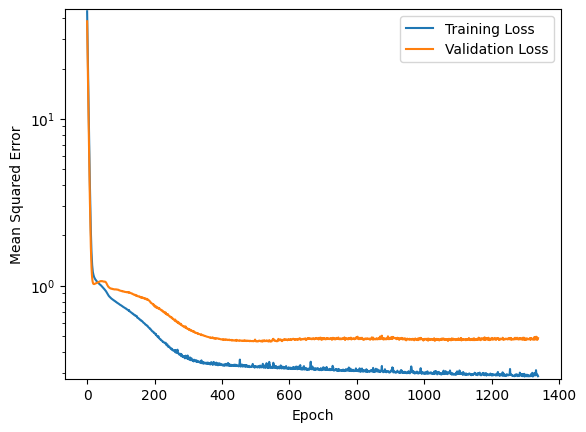


 Evaluate the new model against the test set:
4/4 [==============================] - 0s 2ms/step - loss: 0.2548 - mean_squared_error: 0.2548
Weight: 0.4279146194458008
Weight: 0.18752948939800262
Weight: -0.0771491676568985
Weight: -0.2947746515274048
Weight: 0.521597683429718
Weight: -0.5010119080543518
Weight: -0.2043662965297699
Weight: 0.28950035572052
Weight: -0.24664245545864105
Weight: 0.4284653961658478


In [129]:
# The following variables are the hyperparameters.
learning_rate = 0.00009
epochs = 4000
batch_size = 15
l2_regularization = 2
patience = 40

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.05

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate, l2_regularization)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, patience, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

input_layer = my_model.layers[11]
weights, biases = input_layer.get_weights()

for weight in weights:
    print(f"Weight: {weight[0]}")


In [133]:
# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['Row', 'Predicted Body Fat', 'Correct Body Fat', 'Difference (%)'])

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    test_features = {name: np.array([value]) for name, value in row.items() if name != 'BodyFat'}

    # Get the correct label for the current row
    correct_label = np.array([row['BodyFat']])
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    predicted_bodyfat_normalized = predictions['dense_output'][0][0]
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    actual_bodyfat = (correct_label_normalized * np.sqrt(variance)) + mean
    difference = np.round(predicted_bodyfat - actual_bodyfat, 1)
    row_data = pd.DataFrame({'Row': [index],
                             'Predicted Body Fat': [predicted_bodyfat],
                             'Correct Body Fat': [actual_bodyfat],
                             'Difference (%)': [difference]})

    # Concatenate the row DataFrame to the result_table
    result_table = pd.concat([result_table, row_data], ignore_index=True)

pd.options.display.max_rows = 100
result_table

,Row,Predicted Body Fat,Correct Body Fat,Difference (%)
0,246,[26.4],[30.2],[-3.8]
1,79,[25.1],[18.8],[6.3]
2,112,[20.7],[22.1],[-1.4]
3,15,[22.4],[20.9],[1.5]
4,32,[7.6],[11.8],[-4.2]
5,63,[25.2],[25.8],[-0.6]
6,232,[14.6],[15.4],[-0.8]
7,76,[6.0],[8.8],[-2.8]
8,177,[28.9],[29.9],[-1.0]
9,182,[16.8],[11.5],[5.3]
